In [ ]:
%pip install pandas matplotlib statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
# Load data
with open("BTC-2021min.csv", "r") as f:
    data = pd.read_csv(f)

In [ ]:
# Convert to DataFrame and set index
df = data
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.ffill().bfill()

# Check if 'open' column is numeric
if not pd.api.types.is_numeric_dtype(df['open']):
    print("Error: The 'open' column is not numeric. Please check your data.")
    exit()
print("Missing values before filling:", df.isna().sum())
df = df['open']
df = df.ffill().bfill()

len(df)

Missing values before filling: unix          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


610782

In [ ]:
# Resample data to different intervals
# df_2min = df['high'].resample('2min').mean()  # Use mean for resampling
# df_1hour = df['high'].resample('1H').mean()
# df_1day = df['high'].resample('1D').mean()

In [ ]:
# Perform seasonal decomposition on each resampled series
def perform_decomposition(series, period):
    try:
        decomposition = seasonal_decompose(series, model='additive', period=period)
        return decomposition
    except ValueError as e:
        if "x must have 2 complete cycles" in str(e):
            print("Error: Not enough data for seasonal decomposition. You need at least two cycles of data.")
            return None
        else:
            print(f"An error occurred during seasonal decomposition: {e}")
            return None

In [ ]:
# Determine periods based on resampling intervals
# For example, if resampling by 2 minutes, you might not have enough data for seasonal decomposition
# unless you have a very long series. Adjust periods based on your data's characteristics.
decomposition_2min = perform_decomposition(df, period=12*24*30)  # Example period for 2 minutes
decomposition_1hour = perform_decomposition((df-decomposition_2min.seasonal).resample('1H').mean(), period=24*30)  # Example period for 1 hour
decomposition_1day = perform_decomposition((df-decomposition_2min.seasonal-decomposition_1hour.seasonal).resample('1D').mean(), period=30)  # Example period for 1 day


In [ ]:
display(decomposition_2min.observed, decomposition_2min.trend, decomposition_2min.seasonal, decomposition_2min.resid)
# display(decomposition_1hour.trend)
# display(decomposition_1day.trend)

date
2022-03-01 03:43:00    43046.58
2022-03-01 03:41:00    43018.23
2022-03-01 03:40:00    43022.24
2022-03-01 03:39:00    43035.16
2022-03-01 03:38:00    43077.82
                         ...   
2021-01-01 00:05:00    29021.86
2021-01-01 00:04:00    29048.13
2021-01-01 00:03:00    29037.68
2021-01-01 00:02:00    29069.80
2021-01-01 00:01:00    29007.31
Name: open, Length: 610782, dtype: float64

date
2022-03-01 03:43:00   NaN
2022-03-01 03:41:00   NaN
2022-03-01 03:40:00   NaN
2022-03-01 03:39:00   NaN
2022-03-01 03:38:00   NaN
                       ..
2021-01-01 00:05:00   NaN
2021-01-01 00:04:00   NaN
2021-01-01 00:03:00   NaN
2021-01-01 00:02:00   NaN
2021-01-01 00:01:00   NaN
Name: trend, Length: 610782, dtype: float64

date
2022-03-01 03:43:00   -33.954141
2022-03-01 03:41:00   -19.442271
2022-03-01 03:40:00   -22.469103
2022-03-01 03:39:00   -31.013948
2022-03-01 03:38:00   -27.548132
                         ...    
2021-01-01 00:05:00    62.388470
2021-01-01 00:04:00    50.626172
2021-01-01 00:03:00    38.540039
2021-01-01 00:02:00    44.793832
2021-01-01 00:01:00    85.194607
Name: seasonal, Length: 610782, dtype: float64

date
2022-03-01 03:43:00   NaN
2022-03-01 03:41:00   NaN
2022-03-01 03:40:00   NaN
2022-03-01 03:39:00   NaN
2022-03-01 03:38:00   NaN
                       ..
2021-01-01 00:05:00   NaN
2021-01-01 00:04:00   NaN
2021-01-01 00:03:00   NaN
2021-01-01 00:02:00   NaN
2021-01-01 00:01:00   NaN
Name: resid, Length: 610782, dtype: float64

In [ ]:
# Plot results
def plot_decomposition(decomposition, title):
    if decomposition is not None:
        plt.figure(figsize=(12, 8))
        plt.subplot(411)
        plt.plot(decomposition.observed, label='Original')
        plt.legend(loc='upper left')
        
        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend')
        plt.legend(loc='upper left')

        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonal')
        plt.legend(loc='upper left')

        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuals')
        plt.legend(loc='upper left')
        
        plt.tight_layout()
        plt.title(title)
        plt.show()

        print(decomposition.observed)
        print(decomposition.trend)
        print(decomposition.seasonal)
        print(decomposition.resid)



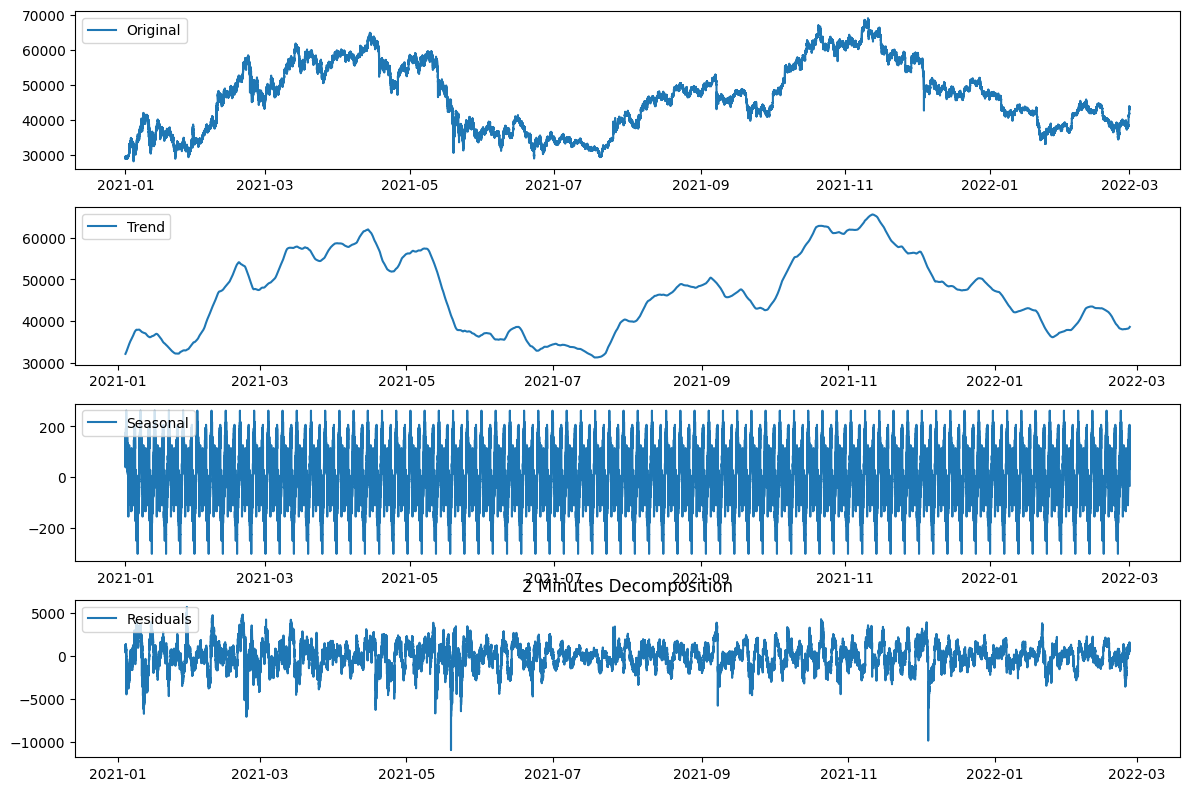

date
2022-03-01 03:43:00    43046.58
2022-03-01 03:41:00    43018.23
2022-03-01 03:40:00    43022.24
2022-03-01 03:39:00    43035.16
2022-03-01 03:38:00    43077.82
                         ...   
2021-01-01 00:05:00    29021.86
2021-01-01 00:04:00    29048.13
2021-01-01 00:03:00    29037.68
2021-01-01 00:02:00    29069.80
2021-01-01 00:01:00    29007.31
Name: open, Length: 610782, dtype: float64
date
2022-03-01 03:43:00   NaN
2022-03-01 03:41:00   NaN
2022-03-01 03:40:00   NaN
2022-03-01 03:39:00   NaN
2022-03-01 03:38:00   NaN
                       ..
2021-01-01 00:05:00   NaN
2021-01-01 00:04:00   NaN
2021-01-01 00:03:00   NaN
2021-01-01 00:02:00   NaN
2021-01-01 00:01:00   NaN
Name: trend, Length: 610782, dtype: float64
date
2022-03-01 03:43:00   -33.954141
2022-03-01 03:41:00   -19.442271
2022-03-01 03:40:00   -22.469103
2022-03-01 03:39:00   -31.013948
2022-03-01 03:38:00   -27.548132
                         ...    
2021-01-01 00:05:00    62.388470
2021-01-01 00:04:00    50.626

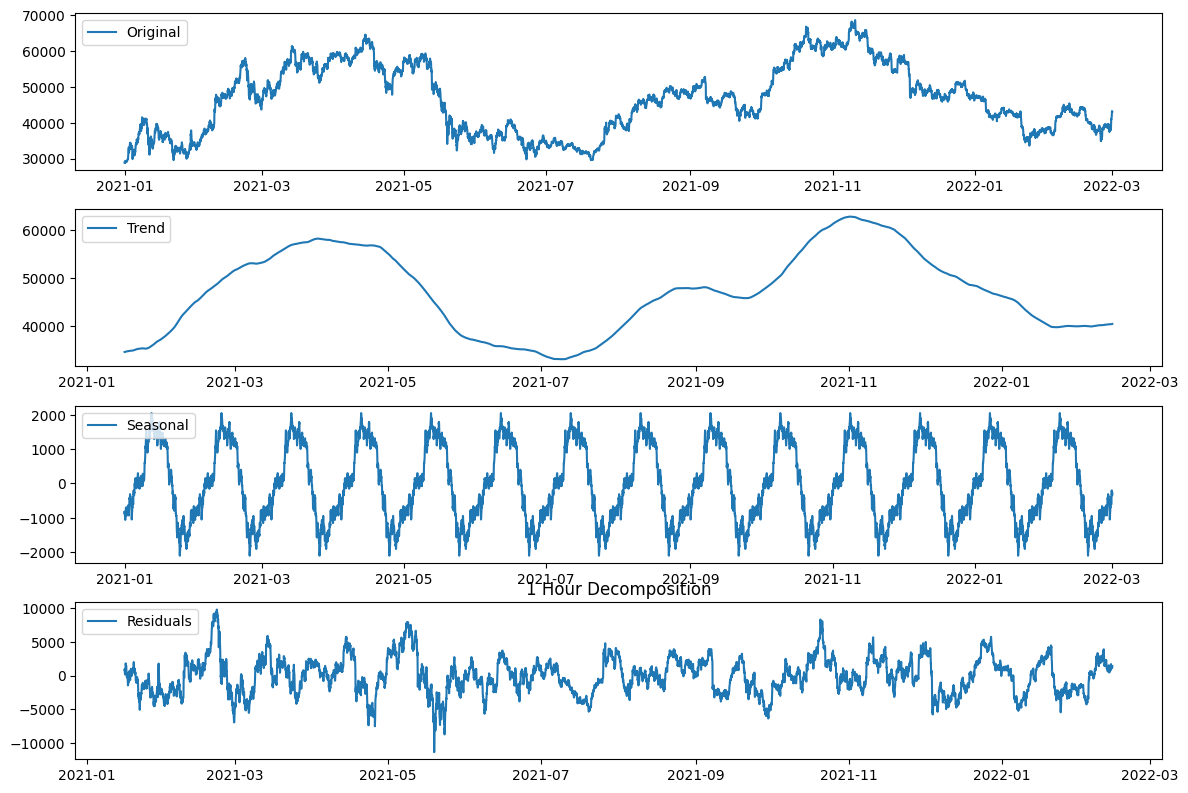

date
2021-01-01 00:00:00    28831.057889
2021-01-01 01:00:00    29222.724828
2021-01-01 02:00:00    29240.644717
2021-01-01 03:00:00    29190.025279
2021-01-01 04:00:00    29193.567916
                           ...     
2022-02-28 23:00:00    43005.155015
2022-03-01 00:00:00    43243.668034
2022-03-01 01:00:00    43218.257474
2022-03-01 02:00:00    43064.122539
2022-03-01 03:00:00    43058.510522
Freq: H, Length: 10180, dtype: float64
date
2021-01-01 00:00:00   NaN
2021-01-01 01:00:00   NaN
2021-01-01 02:00:00   NaN
2021-01-01 03:00:00   NaN
2021-01-01 04:00:00   NaN
                       ..
2022-02-28 23:00:00   NaN
2022-03-01 00:00:00   NaN
2022-03-01 01:00:00   NaN
2022-03-01 02:00:00   NaN
2022-03-01 03:00:00   NaN
Freq: H, Name: trend, Length: 10180, dtype: float64
date
2021-01-01 00:00:00    -836.206667
2021-01-01 01:00:00    -894.340992
2021-01-01 02:00:00    -820.413949
2021-01-01 03:00:00    -930.000286
2021-01-01 04:00:00   -1010.676660
                          ...     
20

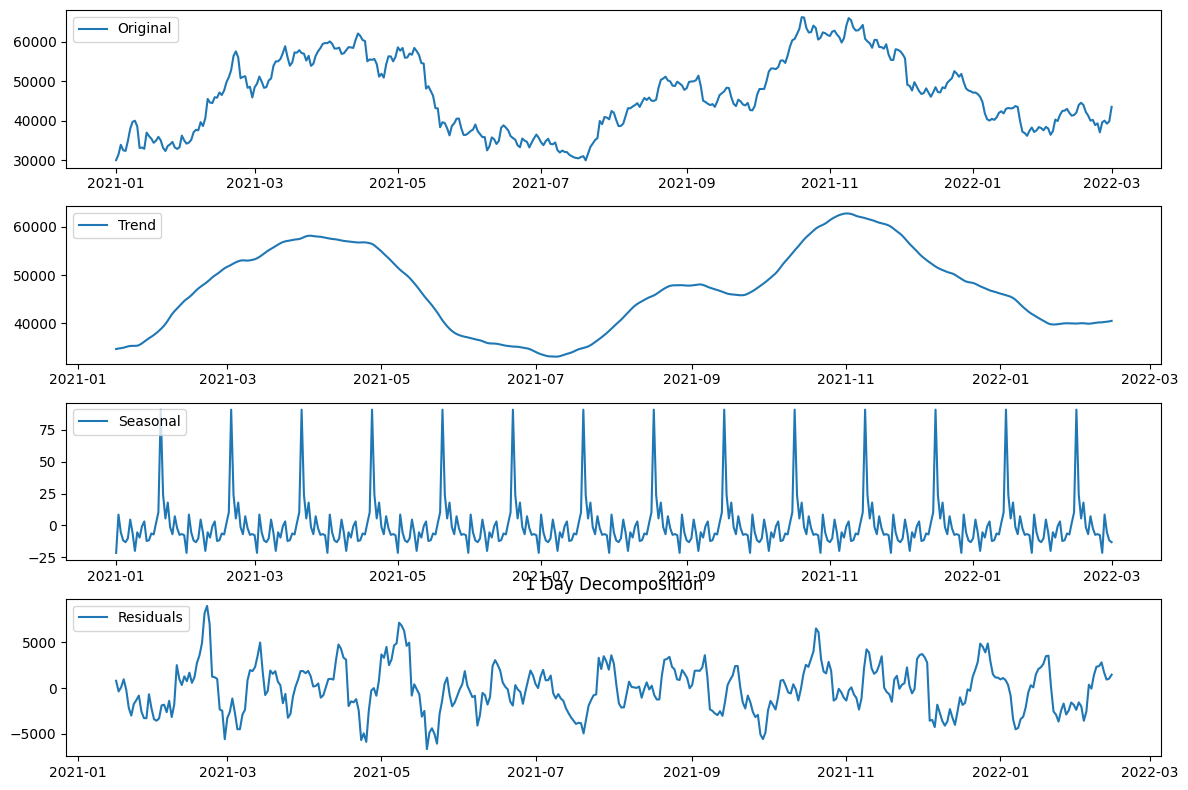

date
2021-01-01    30031.279533
2021-01-02    31455.207145
2021-01-03    33911.190855
2021-01-04    32539.753956
2021-01-05    32354.481211
                  ...     
2022-02-25    39604.615534
2022-02-26    40013.031312
2022-02-27    39255.360438
2022-02-28    39841.878956
2022-03-01    43499.758280
Freq: D, Length: 425, dtype: float64
date
2021-01-01   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
2021-01-05   NaN
              ..
2022-02-25   NaN
2022-02-26   NaN
2022-02-27   NaN
2022-02-28   NaN
2022-03-01   NaN
Freq: D, Name: trend, Length: 425, dtype: float64
date
2021-01-01   -21.591969
2021-01-02     8.506783
2021-01-03    -5.543749
2021-01-04   -11.810479
2021-01-05   -13.203239
                ...    
2022-02-25   -21.591969
2022-02-26     8.506783
2022-02-27    -5.543749
2022-02-28   -11.810479
2022-03-01   -13.203239
Freq: D, Name: seasonal, Length: 425, dtype: float64
date
2021-01-01   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
2021-01-05   NaN
       

In [ ]:

# Plot decompositions
plot_decomposition(decomposition_2min, '2 Minutes Decomposition')
plot_decomposition(decomposition_1hour, '1 Hour Decomposition')
plot_decomposition(decomposition_1day, '1 Day Decomposition')

print("\nAnalysis Complete. Review the plots to understand the seasonality in your data at different intervals.")

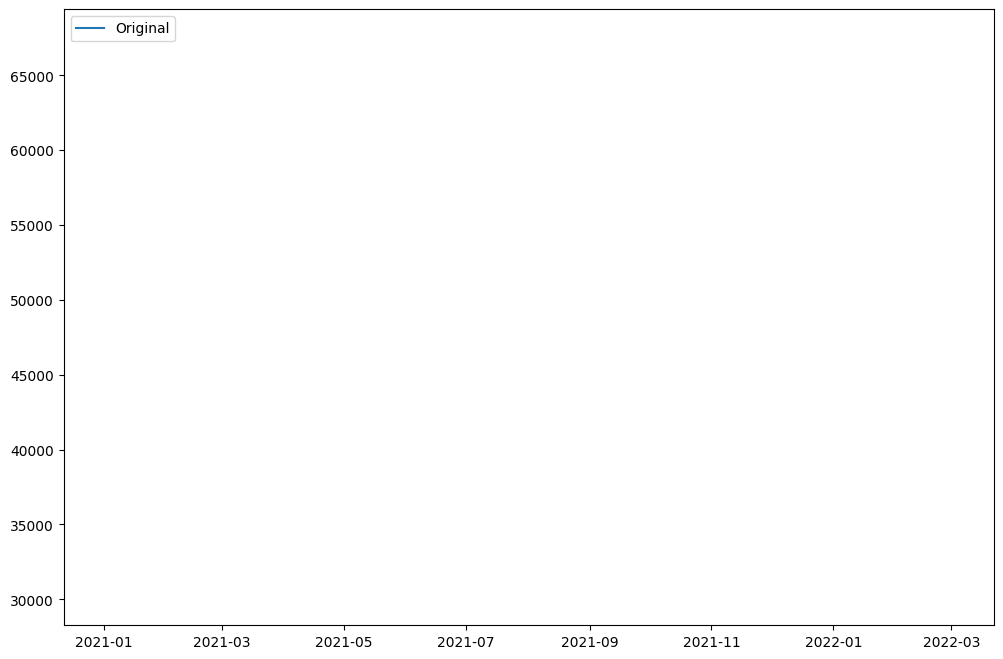

In [ ]:
plt.figure(figsize=(12, 8))
# plt.subplot(411)
plt.plot(df-decomposition_2min.seasonal-decomposition_1hour.seasonal-decomposition_1day.seasonal, label='Original')
plt.legend(loc='upper left')

Missing values before filling: unix          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64
date
2021-01-01 00:01:00    -999.899933
2021-01-01 00:02:00    -928.627420
2021-01-01 00:03:00    -962.741739
2021-01-01 00:04:00    -957.641036
2021-01-01 00:05:00   -1014.556485
Name: resid, dtype: float64


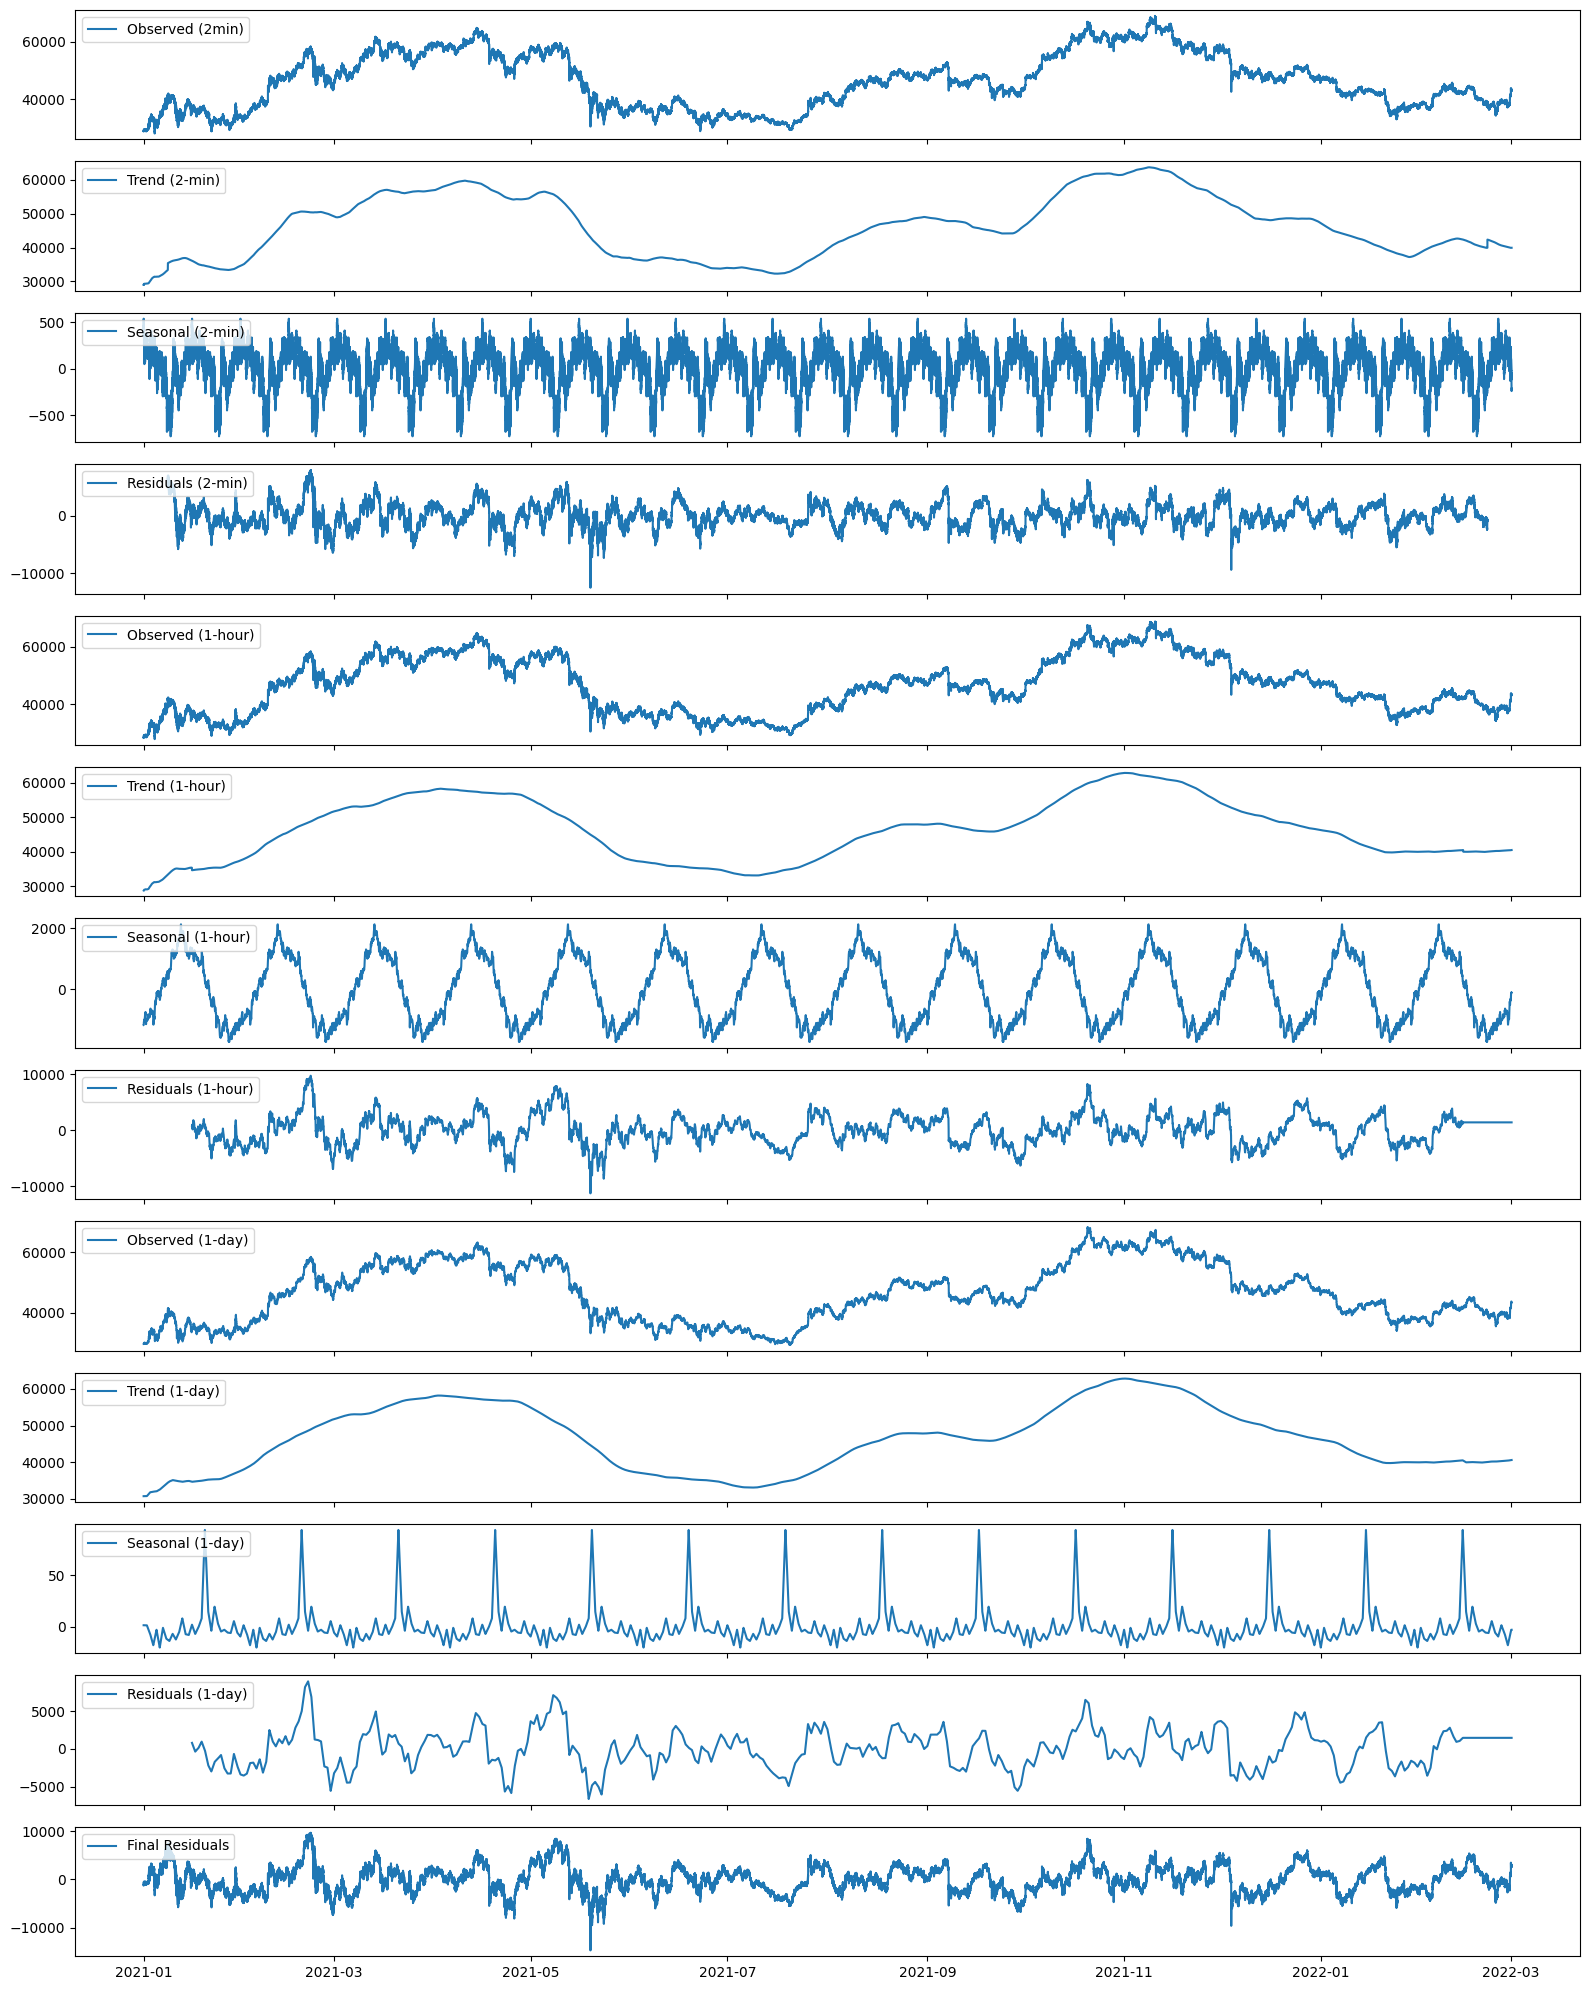

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset
df = pd.read_csv("BTC-2021min.csv", parse_dates=["date"], index_col="date")

# Ensure the data is sorted by date
df = df.sort_index()

# Check for missing values
print("Missing values before filling:", df.isna().sum())

# Fill missing values forward, then backward as a backup
df = df.ffill().bfill()

# Function to perform seasonal decomposition safely
def perform_decomposition(series, period, label):
    """Performs seasonal decomposition with error handling."""
    if len(series.dropna()) < 2 * period:
        print(f"⚠️ Error: Not enough data for {label} decomposition (need at least {2*period} points).")
        return None

    try:
        decomposition = seasonal_decompose(series.dropna(), model="additive", period=period)
        return decomposition
    except ValueError as e:
        print(f"❌ An error occurred during {label} decomposition: {e}")
        return None

# Step 1: Decompose 2-minute interval data (≈ 30 days cycle)
period_2min = 30 * 24 * 30  # 12 points/hour * 24 hours * 30 days
decomposition_2min = perform_decomposition(df["open"], period_2min, "2-minute")
def fill_missing_mean(series):
    """Fills NaN values with the mean of forward and backward values."""
    return series.interpolate(method="linear", limit_direction="both")

if decomposition_2min:
    df["observed_2min"] = df["open"]
    df["trend_2min"] = decomposition_2min.trend
    df["seasonal_2min"] = decomposition_2min.seasonal
    df["resid_2min"] = decomposition_2min.resid

    # Fill NaN values in trend using rolling mean
    df["trend_2min"] = df["trend_2min"].fillna(df["open"].rolling(period_2min, min_periods=1).mean())

    # Step 2: Remove seasonality and resample to 1-hour data
    df_1hour = df["open"] - df["seasonal_2min"]
    df["observed_1hour"] = df_1hour
    
    df_1hour = df_1hour.resample("1H").mean().ffill()

    # Step 3: Decompose 1-hour interval data (≈ 30 days cycle)
    period_1hour = 24 * 30
    decomposition_1hour = perform_decomposition(df_1hour, period_1hour, "1-hour")

    if decomposition_1hour:
        df["trend_1hour"] = decomposition_1hour.trend
        df["seasonal_1hour"] = decomposition_1hour.seasonal
        df["resid_1hour"] = decomposition_1hour.resid

        # Fill missing values in trend using rolling mean
        df["trend_1hour"] = df["trend_1hour"].fillna(df_1hour.rolling(period_1hour, min_periods=1).mean())

        # Step 4: Remove 1-hour seasonality and resample to 1-day data
        df_1day = df["open"] - df["seasonal_2min"] - df["seasonal_1hour"]
        df["observed_1day"] = df_1day.ffill()
        df_1day = df_1day.resample("1D").mean().ffill()

        # Step 5: Decompose 1-day interval data (≈ 30 days cycle)
        period_1day = 30
        decomposition_1day = perform_decomposition(df_1day, period_1day, "1-day")

        if decomposition_1day:
            df["trend_1day"] = decomposition_1day.trend
            df["seasonal_1day"] = decomposition_1day.seasonal
            df["resid_1day"] = decomposition_1day.resid

            # Fill missing values in trend using rolling mean
            df["trend_1day"] = df["trend_1day"].fillna(df_1day.rolling(period_1day, min_periods=1).mean())

df["seasonal_2min"] = fill_missing_mean(df["seasonal_2min"])
df["seasonal_1hour"] = fill_missing_mean(df["seasonal_1hour"])
df["trend_1day"] = fill_missing_mean(df["trend_1day"])
df["seasonal_1day"] = fill_missing_mean(df["seasonal_1day"])


df["resid"] = df["open"] - df["seasonal_2min"] - df["seasonal_1hour"] - df["trend_1day"] - df["seasonal_1day"]


# Interpolating missing values before plotting
for col in ["trend_1hour", "seasonal_1hour", "resid_1hour", "trend_1day", "seasonal_1day", "resid_1day"]:
    df[col] = df[col].interpolate()

# Display first few rows
# print(df[["open", "trend_2min", "seasonal_2min", "resid_2min"]].dropna().head())
# print(df[["trend_1hour", "seasonal_1hour", "resid_1hour"]].dropna().head())
# print(df[["trend_1day", "seasonal_1day", "resid_1day"]].dropna().head())
print(df["resid"].dropna().head())

fig, axes = plt.subplots(13, 1, figsize=(16, 20), sharex=True)

series_list = [
    ("Observed (2min)", df["observed_2min"]),
    ("Trend (2-min)", df["trend_2min"]),
    ("Seasonal (2-min)", df["seasonal_2min"]),
    ("Residuals (2-min)", df["resid_2min"]),
    ("Observed (1-hour)", df["observed_1hour"]),
    ("Trend (1-hour)", df["trend_1hour"]),
    ("Seasonal (1-hour)", df["seasonal_1hour"]),
    ("Residuals (1-hour)", df["resid_1hour"]),
    ("Observed (1-day)", df["observed_1day"]),
    ("Trend (1-day)", df["trend_1day"]),
    ("Seasonal (1-day)", df["seasonal_1day"]),
    ("Residuals (1-day)", df["resid_1day"]),
    ("Final Residuals", df["resid"])
]

for ax, (title, series) in zip(axes, series_list):
    if not series.dropna().empty:
        ax.plot(series, label=title)
        ax.legend(loc='upper left')
    else:
        print(f"⚠️ Warning: {title} has no data to plot!")

plt.tight_layout()
plt.show()



In [ ]:
# from statsmodels.tsa.seasonal import STL

# stl = STL(df["open"], period=1440)  # Test with 1440 (daily seasonality)
# result = stl.fit()
# result.seasonal.plot(title="Detected Seasonality")
# plt.show()


Missing values before filling: unix          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


C:\Users\S\AppData\Local\Temp\ipykernel_1608\1284846747.py:21: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return series.interpolate(method="linear", limit_direction="both")


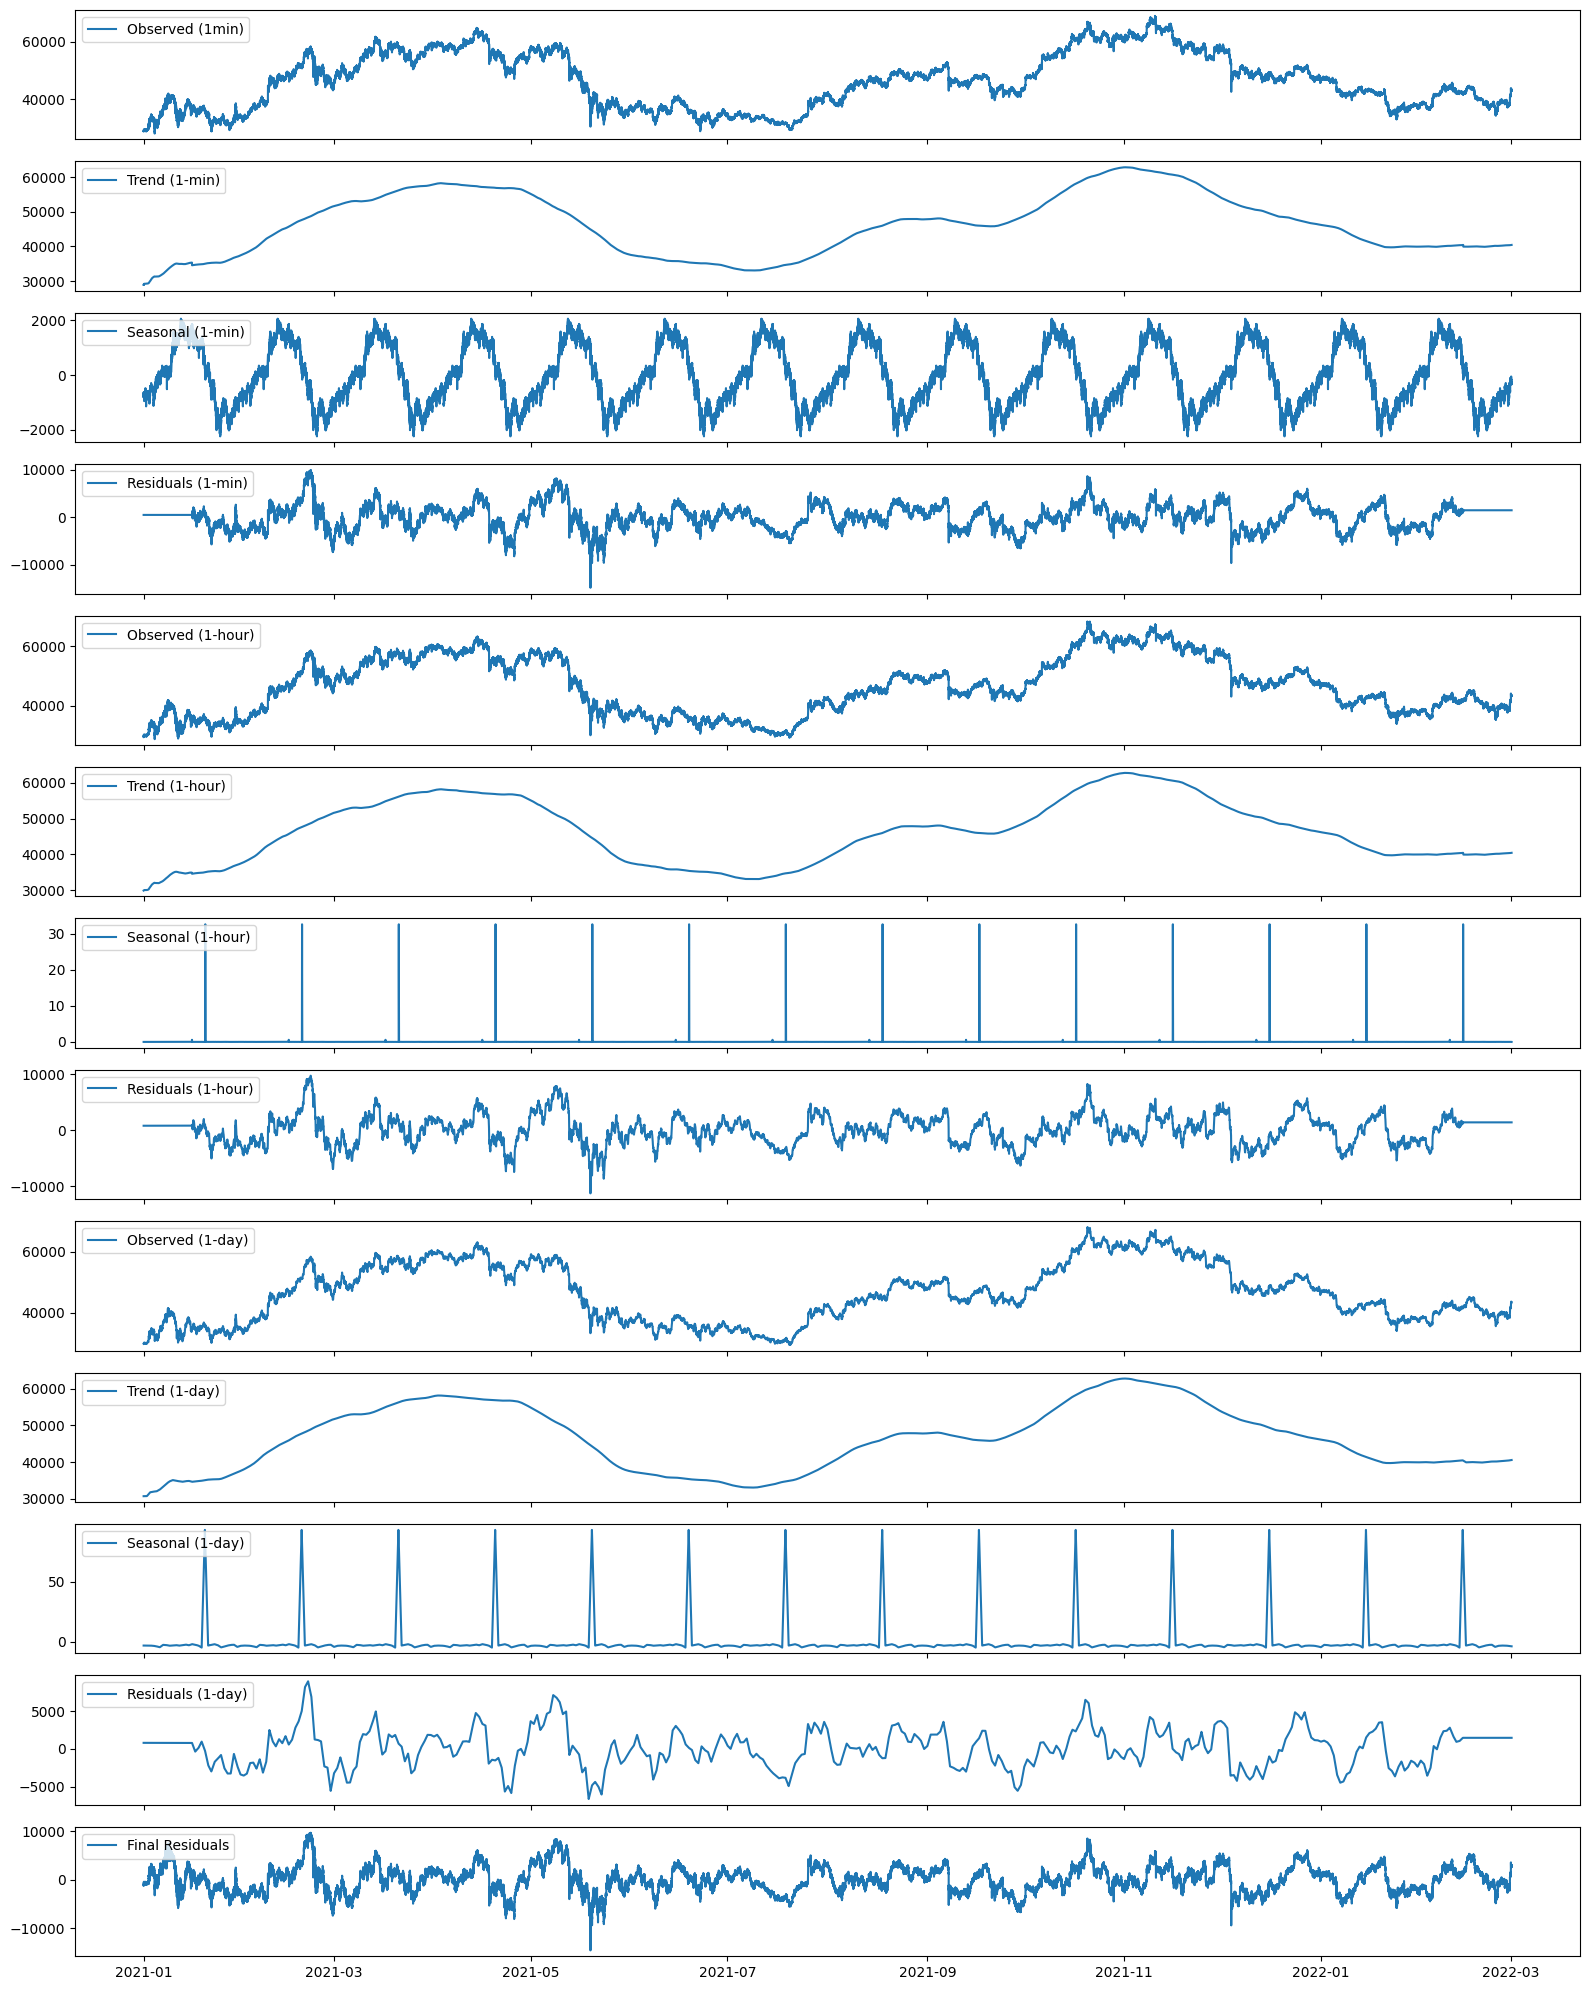

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

class Decomposer:
    def __init__(self, df, period, classname):
        self.classname = classname
        self.df = df.copy()
        self.period = period
        self.results = {}
        self._prepare_data()
    
    def _prepare_data(self):
        """Ensure data is sorted and missing values are handled."""
        self.df = self.df.sort_index()
        print("Missing values before filling:", self.df.isna().sum())
    
    def _fill_missing_mean(self, series):
        """Fills NaN values with the mean of forward and backward values."""
        return series.interpolate(method="linear", limit_direction="both")
    
    def _perform_decomposition(self, series, period, label):
        """Performs seasonal decomposition with error handling."""
        if len(series.dropna()) < 2 * period:
            print(f"⚠️ Error: Not enough data for {label} decomposition (need at least {2*period} points).")
            return None
        
        try:
            decomposition = seasonal_decompose(series.dropna(), model="additive", period=period)
            return decomposition
        except ValueError as e:
            print(f"❌ An error occurred during {label} decomposition: {e}")
            return None
    
    def decompose(self):
        """Performs multi-level decomposition based on the given period."""
        period_2min = self.period
        decomposition_2min = self._perform_decomposition(self.df[self.classname], period_2min, "2-minute")
        
        if decomposition_2min:
            self.df["observed_1min"] = self.df[self.classname]
            self.df["trend_1min"] = decomposition_2min.trend
            self.df["seasonal_1min"] = decomposition_2min.seasonal
            self.df["resid_1min"] = decomposition_2min.resid
            
            self.df["trend_1min"] = self.df["trend_1min"].fillna(self.df[self.classname].rolling(period_2min, min_periods=1).mean())
            self.df["observed_1hour"] = self.df[self.classname] - self.df["seasonal_1min"]
            df_1hour = self.df["observed_1hour"].resample("1H").mean()
            
            period_1hour = int(self.period / 60)

            decomposition_1hour = self._perform_decomposition(df_1hour, period_1hour, "1-hour")
            
            if decomposition_1hour:
                self.df["trend_1hour"] = decomposition_1hour.trend
                self.df["seasonal_1hour"] = decomposition_1hour.seasonal
                self.df["resid_1hour"] = decomposition_1hour.resid
                
                self.df["trend_1hour"] = self.df["trend_1hour"].fillna(df_1hour.rolling(period_1hour, min_periods=1).mean())
                self.df["observed_1day"] = self.df[self.classname] - self.df["seasonal_1min"] - self.df["seasonal_1hour"]
                df_1day = self.df["observed_1day"].resample("1D").mean()
                
                period_1day = int(period_1hour / 24)
                decomposition_1day = self._perform_decomposition(df_1day, period_1day, "1-day")
                
                if decomposition_1day:
                    self.df["trend_1day"] = decomposition_1day.trend
                    self.df["seasonal_1day"] = decomposition_1day.seasonal
                    self.df["resid_1day"] = decomposition_1day.resid
                    
                    self.df["trend_1day"] = self.df["trend_1day"].fillna(df_1day.rolling(period_1day, min_periods=1).mean())
        
        self.df = self.df.apply(self._fill_missing_mean)
        self.df["resid"] = self.df[self.classname] - self.df["seasonal_1min"] - self.df["seasonal_1hour"] - self.df["trend_1day"] - self.df["seasonal_1day"]
    
    def plot_results(self):
        """Plots the decomposition results."""
        fig, axes = plt.subplots(13, 1, figsize=(16, 20), sharex=True)
        series_list = [
            ("Observed (1min)", self.df["observed_1min"]),
            ("Trend (1-min)", self.df["trend_1min"]),
            ("Seasonal (1-min)", self.df["seasonal_1min"]),
            ("Residuals (1-min)", self.df["resid_1min"]),
            ("Observed (1-hour)", self.df["observed_1hour"]),
            ("Trend (1-hour)", self.df["trend_1hour"]),
            ("Seasonal (1-hour)", self.df["seasonal_1hour"]),
            ("Residuals (1-hour)", self.df["resid_1hour"]),
            ("Observed (1-day)", self.df["observed_1day"]),
            ("Trend (1-day)", self.df["trend_1day"]),
            ("Seasonal (1-day)", self.df["seasonal_1day"]),
            ("Residuals (1-day)", self.df["resid_1day"]),
            ("Final Residuals", self.df["resid"])
        ]

        for ax, (title, series) in zip(axes, series_list):
            if series is not None and not series.dropna().empty:
                ax.plot(series, label=title)
                ax.legend(loc='upper left')
            else:
                print(f"⚠️ Warning: {title} has no data to plot!")
        
        plt.tight_layout()
        plt.show()

# Usage Example:
df = pd.read_csv("BTC-2021min.csv", parse_dates=["date"], index_col="date")
decomposer = Decomposer(df, period=30*24*60, classname="open")  # Example period
decomposer.decompose()
decomposer.plot_results()
